# <center> NSL-KDD Dataset Preprocessing Notebook <center/>

Import necessary libraries

In [10]:
import sys
sys.path.append('../utils')
sys.path.append('../models')
import pandas as pd
import numpy as np
import  pickle
from ydata_profiling import ProfileReport

import matplotlib.pyplot as plt
%matplotlib inline
from preprocessing import get_data

from sklearn.preprocessing import StandardScaler, RobustScaler,power_transform
from scipy.stats import skew

## Read data and do Profiling

In [11]:
train,test, label_mapping = get_data()

profile = ProfileReport(train)
profile.to_file("NSLKDD profile report.html")

d:\WorkSpace\GAN\GANs_for_Network_Intrusion_Data\NSL-KDD\notebooks
True


Export report to file: 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]


Remove rejected features

In [12]:
to_remove = profile.get_rejected_variables()
train.drop(to_remove, axis=1, inplace=True)
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,1,1,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,2,1,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,3,2,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,4,1,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,4,1,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [13]:
data ,y_train = train.drop(["label"],axis=1),train.label.values

label_cols = ['label']
data_cols = list(data.columns)

## <center> Scale Data <center/>

### Robust Scaler

In [14]:
data_Robust_trans = pd.DataFrame(data=RobustScaler(quantile_range=(0.1, 99.9 )).fit_transform(data[data_cols].values),columns=list(data.columns))
data_Robust_trans.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.0,-0.048387,0.000000,0.000204,0.000000,0.0,0.0,0.0,0.0,...,-0.413386,-0.149606,-0.34,0.01,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,0.5,-0.032258,0.000000,0.000046,0.000000,0.0,0.0,0.0,0.0,...,0.000000,-0.244094,-0.51,0.58,0.88,0.00,0.00,0.00,0.00,0.00
2,0.0,0.0,-0.016129,0.111111,-0.000020,0.000000,0.0,0.0,0.0,0.0,...,0.000000,-0.145669,-0.41,0.03,0.00,0.00,1.00,1.00,0.00,0.00
3,0.0,0.0,0.000000,0.000000,0.000086,0.035093,0.0,0.0,0.0,0.0,...,-0.885827,0.755906,0.49,-0.02,0.03,0.04,0.03,0.01,0.00,0.01
4,0.0,0.0,0.000000,0.000000,0.000071,0.001808,0.0,0.0,0.0,0.0,...,0.000000,0.755906,0.49,-0.02,0.00,0.00,0.00,0.00,0.00,0.00


In [15]:
data_Robust_trans.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,0.007185,0.125324,0.114631,0.069133,0.020743,0.085135,0.000198,0.007562,0.000111,0.006814,...,-0.286815,0.207295,0.011242,0.062951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,0.065171,0.282603,0.205811,0.113911,2.674875,17.308644,0.014086,0.084510,0.014366,0.071666,...,0.390576,0.435838,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.000000,0.000000,-0.048387,0.000000,-0.000020,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.003937,-0.248031,-0.510000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-0.016129,0.000000,-0.000020,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.681102,-0.208661,-0.460000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.177419,0.111111,0.000106,0.002221,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.755906,0.490000,0.050000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,1.073651,1.000000,1.064516,1.111111,628.794266,5638.329329,1.000000,1.000000,3.000000,2.566667,...,0.000000,0.755906,0.490000,0.980000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
def Plot_data_features(data_cols, X, y = None):
    axarr = [[]]*len(data_cols)
    columns = 4
    rows = int( np.ceil( len(data_cols) / columns ) )
    f, fig = plt.subplots( figsize=(columns*3.5, rows*2) )

    f.suptitle('Data Distributions by Feature and Class', size=16)

    for i, col in enumerate(data_cols[:]):
        axarr[i] = plt.subplot2grid( (int(rows), int(columns)), (int(i//columns), int(i%columns)) )
        axarr[i].hist( [ X.loc[ y == 1, col ], X.loc[ y != 1, col ] ], label=['Normal','Attack'], 
                              bins=np.linspace( np.percentile(X[col],0.1), np.percentile(X[col],99.9), 30 ),
                              normed=True )
        axarr[i].set_xlabel(col, size=12)
        axarr[i].set_ylim([0,0.8])
        axarr[i].tick_params(axis='both', labelsize=10)
        if i == 0: 
            legend = axarr[i].legend()
            legend.get_frame().set_facecolor('white')
        if i%4 != 0 : 
            axarr[i].tick_params(axis='y', left='off', labelleft='off')
        else:
            axarr[i].set_ylabel('Fraction',size=12)

    plt.tight_layout(rect=[0,0,1,0.95]) 
    plt.show()

AttributeError: Rectangle.set() got an unexpected keyword argument 'normed'

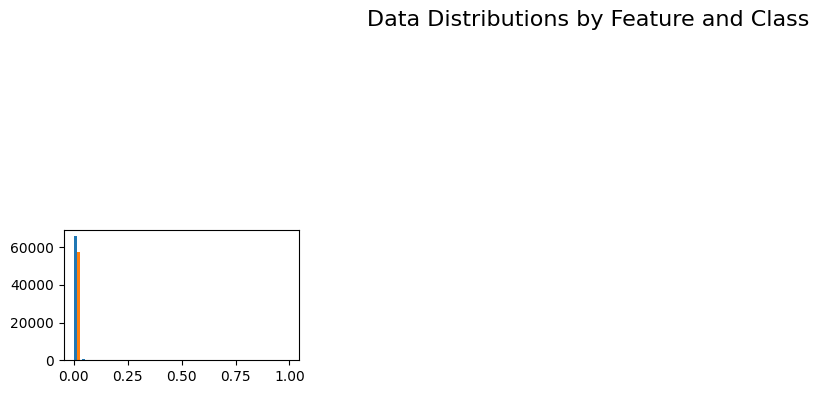

In [17]:
Plot_data_features(X=data_Robust_trans,data_cols=data_cols,y=y_train)

In [42]:
#Save data
data_Robust_trans["Class"] = y_train
pickle.dump(data_Robust_trans, open('../Data/NSL-KDD/data_Robust_trans.pkl','wb'))

### Power Transform

In [9]:
data_power_trans = pd.DataFrame(data=power_transform(X=data.values,method="yeo-johnson"),columns=list(data.columns))
# data_power_trans.describe()
data_power_trans.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,-0.293467,-0.476159,-2.046509,-0.811815,1.012501,-0.900230,-0.014089,-0.093425,-0.008453,-0.147181,...,-0.381289,0.778461,-0.746146,-0.496460,-0.309308,-0.479823,-0.728866,-0.106055,1.249816,-0.591798
1,-0.293467,2.085784,-1.269036,-0.811815,0.654220,-0.900230,-0.014089,-0.093425,-0.008453,-0.147181,...,-0.381289,-1.320214,1.887607,-0.496460,0.732270,-1.589673,-1.203503,2.308407,2.014334,-0.591798
2,-0.293467,-0.476159,-0.787101,1.007423,-1.119311,-0.900230,-0.014089,-0.093425,-0.008453,-0.147181,...,-0.381289,-1.356394,1.068041,-0.496460,0.732270,-0.459048,-0.917737,0.332260,-0.670457,-0.591798
3,-0.293467,-0.476159,-0.448643,-0.811815,0.793761,1.454865,-0.014089,-0.093425,-0.008453,-0.147181,...,-0.381289,0.778461,-0.746146,-0.496460,-1.531294,1.096817,1.049686,-0.973971,-0.108002,1.446408
4,-0.293467,-0.476159,-0.448643,-0.811815,0.747902,0.968808,-0.014089,-0.093425,-0.008453,-0.147181,...,-0.381289,0.778461,-0.746146,1.307375,0.732270,1.096817,1.049686,-0.973971,-0.670457,-0.591798


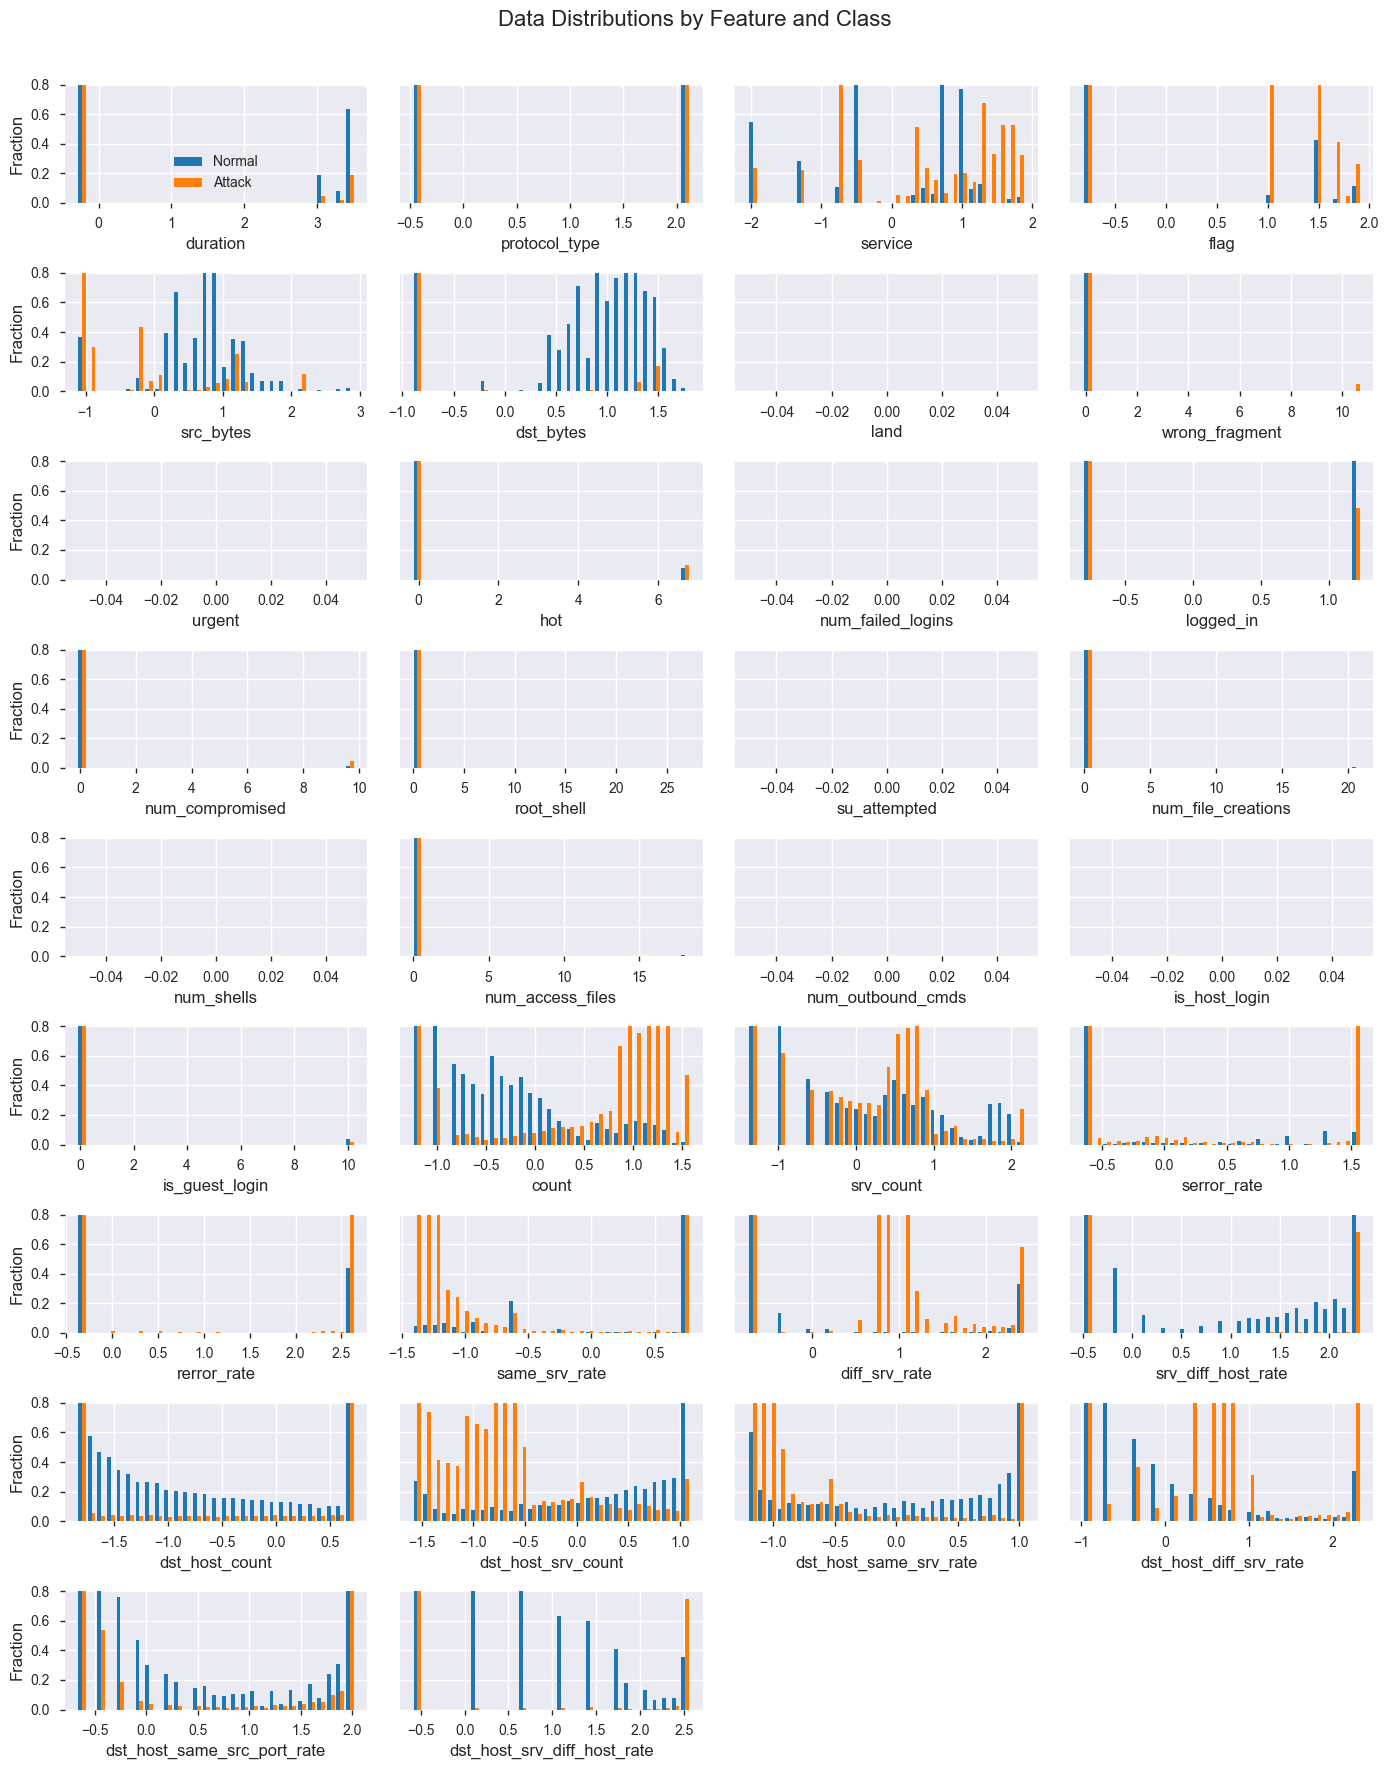

In [10]:
Plot_data_features(X = data_power_trans, data_cols=data_cols, y=y_train)

In [45]:
#Dump new transformed dataset in pickle file
data_power_trans["Class"] = y_train
with open('../Data/NSL-KDD/data_power_trans.pickle', 'wb') as f:
    pickle.dump(data_power_trans,f)

### Standard Scaler

In [11]:
data_std = StandardScaler().fit_transform(data.values)
data_std = pd.DataFrame(data=data_std,columns=list(data.columns))
# data_std.describe()
data_std.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,-0.110249,-0.443466,-0.792078,-0.606907,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.374362,0.771283,-0.349683,-0.374560,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103
1,-0.110249,1.325807,-0.713710,-0.606907,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.374362,-1.321428,0.482201,-0.374560,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103
2,-0.110249,-0.443466,-0.635342,0.368519,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.374362,-1.389669,0.038529,-0.374560,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103
3,-0.110249,-0.443466,-0.556973,-0.606907,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.374362,0.771283,-0.349683,-0.374560,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252
4,-0.110249,-0.443466,-0.556973,-0.606907,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.374362,0.771283,-0.349683,-0.028179,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103


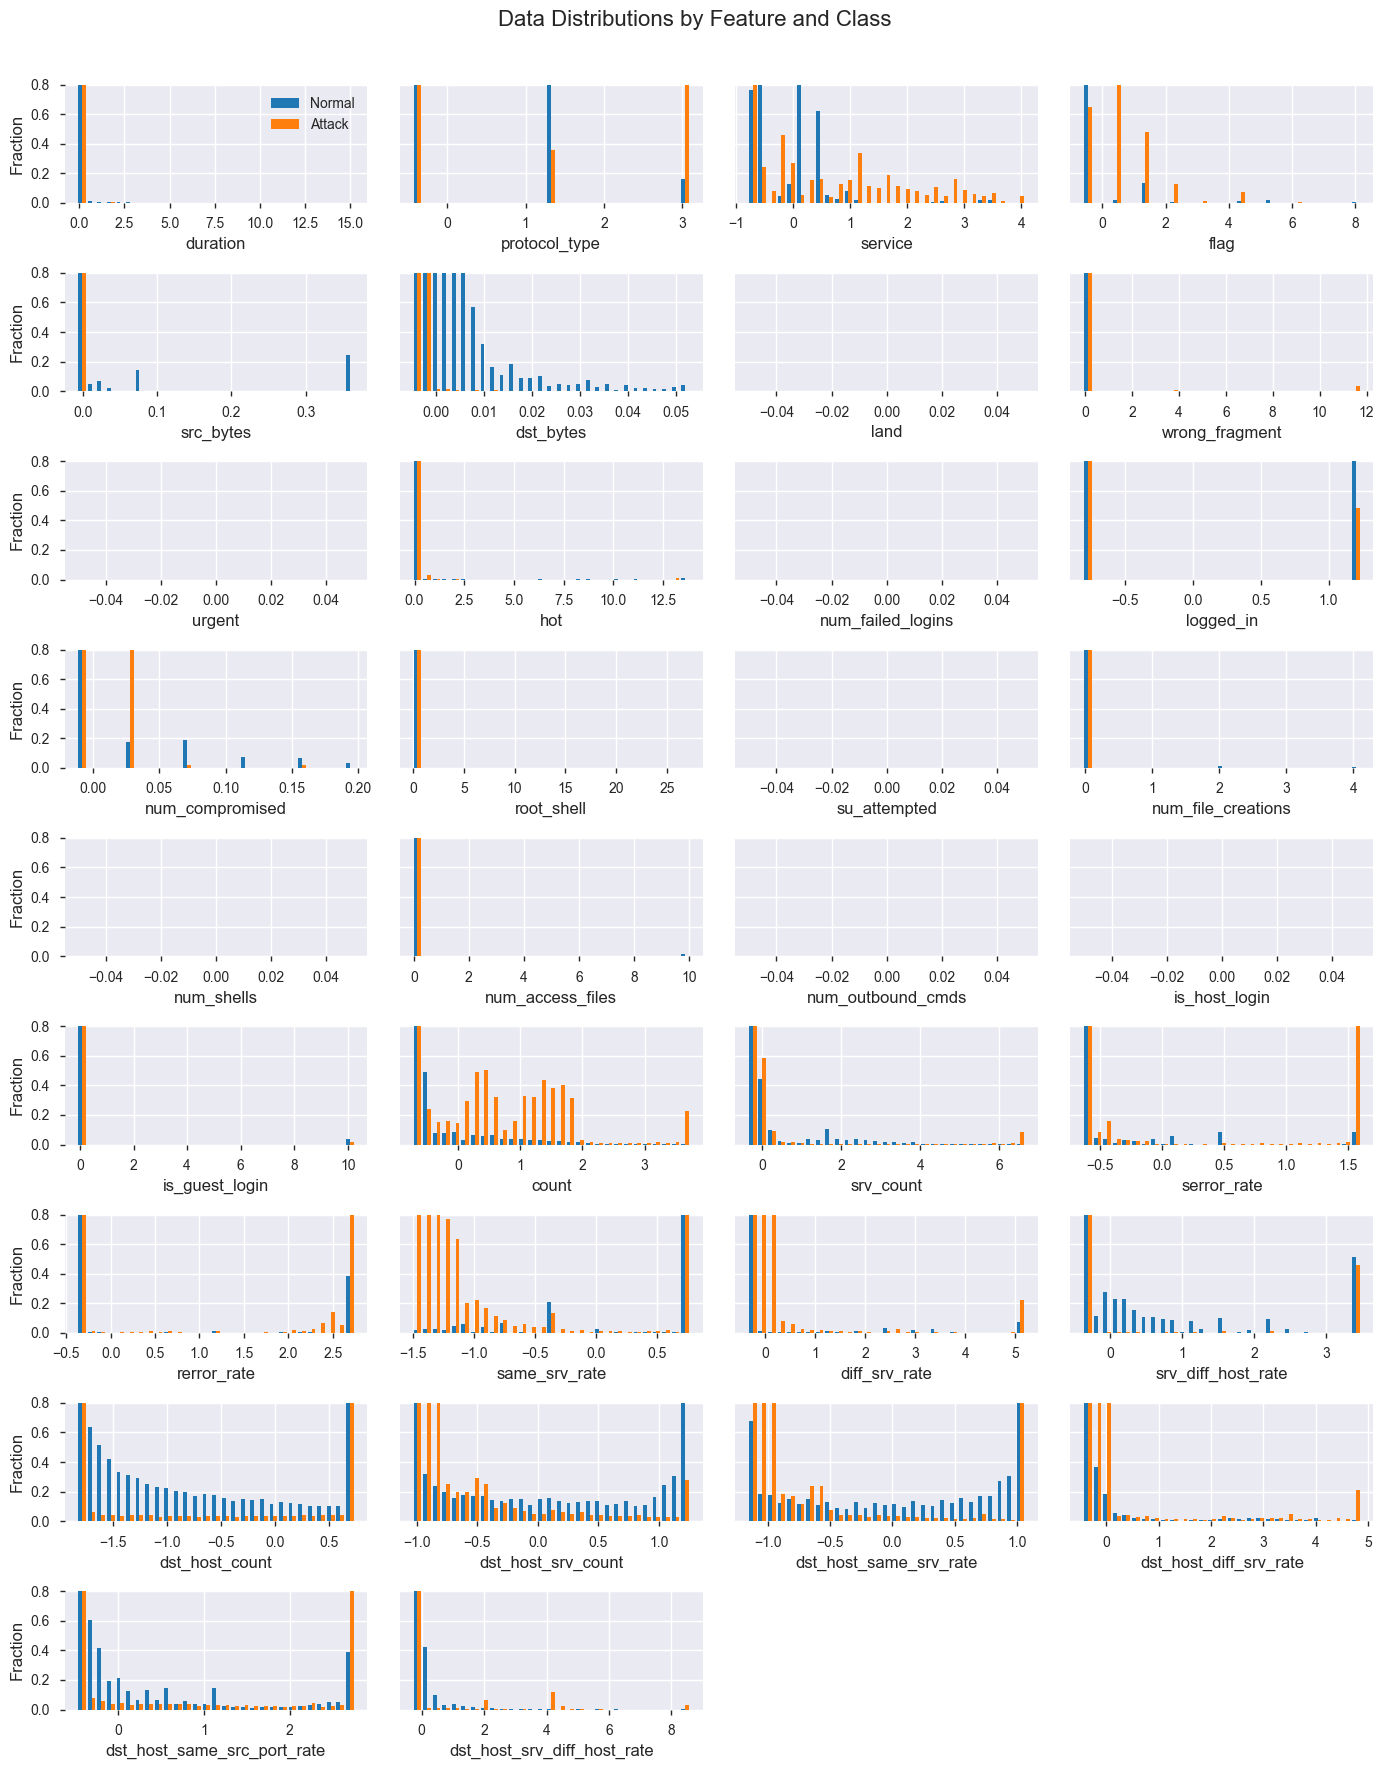

In [12]:
Plot_data_features(X= data_std, data_cols = data_cols, y=y_train)

In [30]:
#Dump new scaled data to pickle file
data_std["Class"] = y_train 
with open('../Data/NSL-KDD/data_std.pickle', 'wb') as f:
    pickle.dump(data_std,f)

In [13]:
label_mapping

{'dos': 0, 'normal': 1, 'probe': 2, 'r2l': 3, 'u2r': 4}